In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Assumes you already have these arrays from earlier cells -----------------
# y_te      : true QFF on test slice
# pred_all  : baseline RBF predictions (all inputs)
# pred_pso  : PSO‑RBF predictions (selected inputs)
# test_idx  : DatetimeIndex corresponding to y_te
# If they’re not yet in memory, adjust the load section below to point to your
# saved Parquet / CSV predictions.

# Fallback (uncomment & edit paths if needed):
# test_df   = pd.read_parquet("../data/processed/96749_test.parquet")
# test_idx  = pd.to_datetime(test_df["ts"])
# y_te      = test_df["QFF"].to_numpy()
# pred_all  = np.load("pred_baseline.npy")
# pred_pso  = np.load("pred_pso.npy")


In [2]:
STATION_ID = '96749' #THIS IS IMPORTANT!

In [3]:
tuned_pso_df = pd.read_csv(f'/home/rzby/airpressure_ann/ann_pressure_prediction/reports/model_results/tuned_pso_{STATION_ID}.csv', index_col='index')

print(tuned_pso_df.head())

                                     0  PRESSURE_QFE_MB_DERIVED
index                                                          
2023-01-01 12:00:00+00:00  1008.289913                   1010.2
2023-01-01 15:00:00+00:00  1009.646806                   1011.2
2023-01-01 18:00:00+00:00  1010.263240                   1009.5
2023-01-01 21:00:00+00:00  1009.276515                   1009.2
2023-01-02 00:00:00+00:00  1009.095282                   1011.2


In [4]:
tuned_pso_df.index = pd.to_datetime(tuned_pso_df.index)

In [5]:
test_idx = tuned_pso_df.index
y_te = tuned_pso_df['PRESSURE_QFE_MB_DERIVED']
tuned_pso = tuned_pso_df['0']

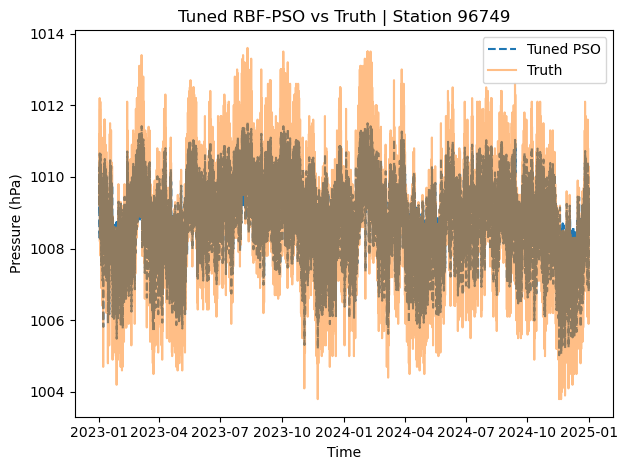

In [7]:

# -----------------------------------------------------------------------------
# 1. Time‑series plot • Baseline vs truth
# -----------------------------------------------------------------------------
plt.figure()
plt.plot(test_idx, tuned_pso, label="Tuned PSO", linestyle="--")
plt.plot(test_idx, y_te, label="Truth", alpha=0.5)
plt.title(f"Tuned RBF-PSO vs Truth | Station {STATION_ID}")
plt.xlabel("Time")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.tight_layout()
plt.savefig(f'/home/rzby/airpressure_ann/ann_pressure_prediction/reports/figures/tunedpso_vs_obs_{STATION_ID}.png')
plt.show()


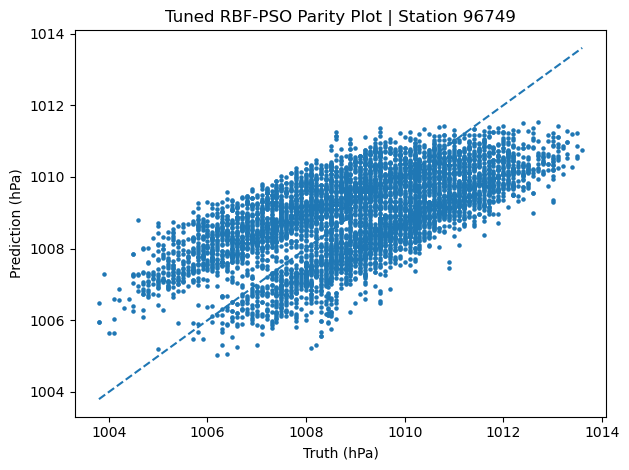

In [9]:

# -----------------------------------------------------------------------------
# 3. Scatter parity plot • Tuned PSO
# -----------------------------------------------------------------------------
plt.figure()
plt.scatter(y_te, tuned_pso, s=5)
plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], linestyle="--")
plt.title(f"Tuned RBF-PSO Parity Plot | Station {STATION_ID}")
plt.xlabel("Truth (hPa)")
plt.ylabel("Prediction (hPa)")
plt.tight_layout()
plt.savefig(f'/home/rzby/airpressure_ann/ann_pressure_prediction/reports/figures/tunedpso_scatter_{STATION_ID}.png')
plt.show()